<a href="https://colab.research.google.com/github/veeralipi22/simplelinear-regression-assignmentQ2/blob/main/Copy_of_simplelinear_regression_AssignmentQ2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Question 1

In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**Eda and data visualization**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


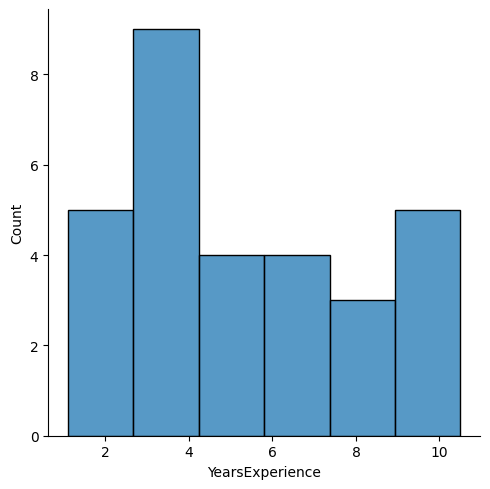

In [9]:
sns.displot(data['YearsExperience'])

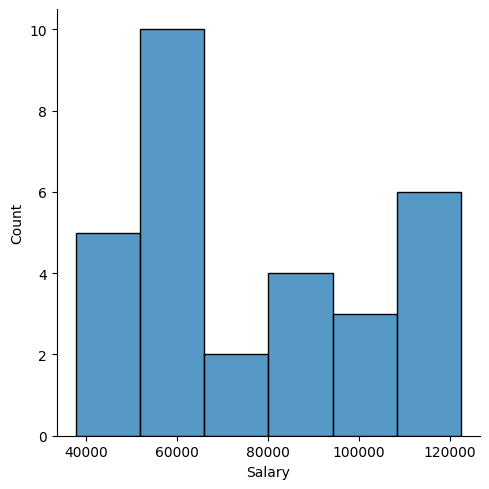

In [10]:
sns.displot(data['Salary'])

In [11]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**Correlation Analysis**

In [12]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

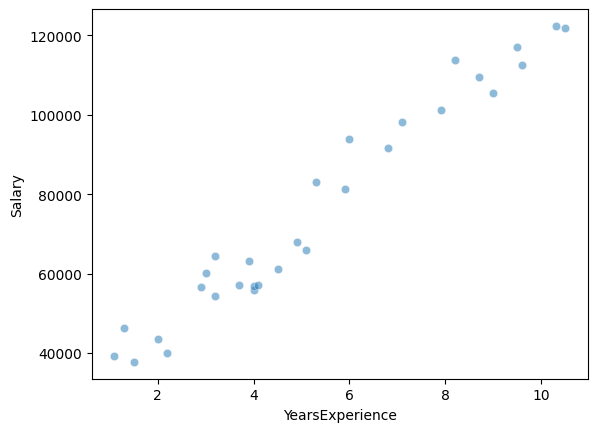

In [14]:
#creating scatterplot
sns.scatterplot(x='YearsExperience', y='Salary', data=data, alpha=0.5)

<Axes: xlabel='Salary', ylabel='YearsExperience'>

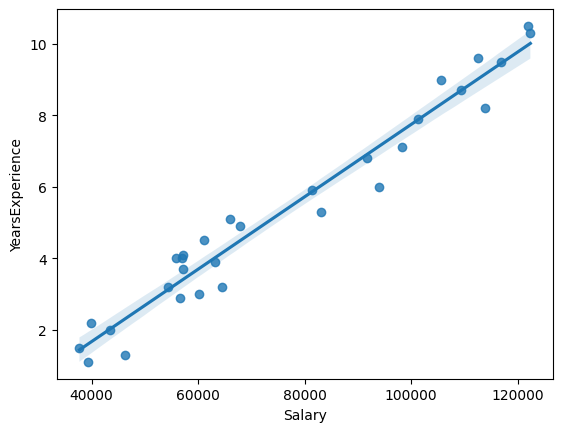

In [17]:
sns.regplot(x=data['Salary'],y=data['YearsExperience'])


**model building**

In [20]:
#creating the model
model = smf.ols('Salary~YearsExperience',data=data).fit()


Model Testing

In [21]:
# To see a summary of the regression results
# Finding Coefficient parameters

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        08:22:47   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
#giving new values to test the model
new_data=pd.Series([3,11,12,13])
new_data

0     3
1    11
2    12
3    13
dtype: int64

In [28]:
new_df = pd.DataFrame(new_data,columns=['YearsExperience'])

In [29]:
new_df

,YearsExperience
0,3
1,11
2,12
3,13


In [30]:
model.predict(new_df)

0     54142.087163
1    129741.785735
2    139191.748056
3    148641.710378
dtype: float64